In [1]:
import os, time
import matplotlib.pyplot as plt
import numpy as np
import dgl
import dgl.function as fn
import pickle as pkl
import torch
from sklearn.metrics import recall_score, precision_score, roc_auc_score

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [3]:
import seaborn
import matplotlib.ticker as ticker

In [4]:
from xgnn_src.shared_networks import MLP, MLP_PRED
from xgnn_src.node.online_kg2 import AllOnlineKG
import torch.nn.functional as F

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 8]

In [6]:
from utils import *
from xgnn_src.node.eval import *

In [7]:
Arg = collections.namedtuple("Arg", ["teacher_name", "hidden_sizes", "n_layers", "dropout", "n_hidden", "all_layer_dp", "skip_norm"])

- Nodes of label 0 belong to the base BA graph
- Nodes of label 1, 2, 3 are separately at the middle, bottom, or top of houses

In [8]:
# ba_shape1.g, ba_shape.pt
bidir = ""
with open('./datasets/ba_shape_%sdir.g'%bidir, 'rb') as f:
    g = pkl.load(f)
if not bidir:
    g = dgl.remove_self_loop(g)
    g = dgl.add_self_loop(g)
num_classes = 4
test_labels = g.ndata['label'][g.ndata['test_mask']]
feats = g.ndata['feat'].size()[1]
arg = Arg("gcn2", [64], 5, 0.5, 32, True, True)
base = init_teacher(arg, g, feats, num_classes)
graph_std = init_graph_student("gcn", g, feats, num_classes, 0.5, n_hidden=32,
                                n_layers=5, hidden_sizes=None, all_layer_dp=True, skip_norm=True)
mlp = MLP(feats, [64], num_classes, F.relu, 0.5, batch_norm=True, norm_type='bn')
online_mode = AllOnlineKG(base, graph_std, mlp, graph_student_name="graphsage")
model = torch.load('./ckpt/gcn/ba_shape_feat_%sdir.pt'%bidir, map_location="cuda:0")
online_mode.load_state_dict(model)

using norm in graph False
GCN2(
  (layers): ModuleList(
    (0): GraphConv(in=3, out=32, normalization=both, activation=None)
    (1): GraphConv(in=32, out=32, normalization=both, activation=None)
    (2): GraphConv(in=32, out=32, normalization=both, activation=None)
    (3): GraphConv(in=32, out=32, normalization=both, activation=None)
    (4): GraphConv(in=32, out=32, normalization=both, activation=None)
    (5): GraphConv(in=32, out=4, normalization=both, activation=None)
  )
  (batch_norms): ModuleList()
  (dropout): Dropout(p=0.5, inplace=False)
)
using norm in graph False
norm type: bn
norm type: bn
norm type: bn


<All keys matched successfully>

In [9]:
b_preds, e_preds = predict(base, graph_std, g)

Base accuracy: 1.0000, Explainer accuracy: 1.0000
Agreement score: 1.0000, KL Score: 0.0009


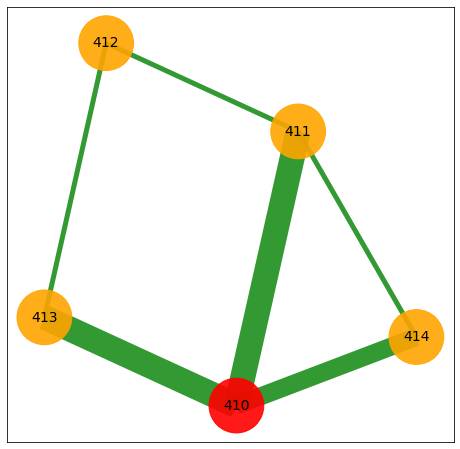

In [18]:
explain_test(g, 410, 5, undir=True, plot=True, scale=60)
# plt.savefig('./images/ba_shape.pdf', format="pdf", dpi=300)

When a node connect to a high degree node => affected by this node when performing PPR

In [9]:
selected_node = list(range(400, 700, 5))
test_graphs = [extract_true_motif(g, i, 399, 5, True) for i in selected_node]

In [ ]:
s = time.time()
pred, rec, _ = evaluate_dataset(g, selected_node, test_graphs, 5, 7, ignore_self_loop=True, dumping_factor=0.55)
print(time.time() - s)
print("F1 %.4f Precision: %.4f Recall %.4f"  % (pred*rec*2/(pred+rec), pred, rec))

***Ground truth***

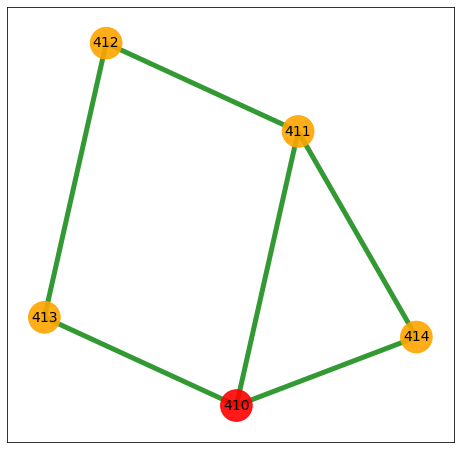

In [20]:
g = test_graphs[2]
nodes = g.ndata['_ID']
labels = {k.item(): v.item() for k, v in zip(g.nodes(), nodes)}
draw_simple_graph(test_graphs[2], [5] * g.num_edges(), True, labels=labels, node_id=410, margin=0.1)
plt.savefig('./images/ba_shape_410_real.pdf', format="pdf", dpi=300)

## BA Community

In [11]:
bidir = ""
with open('./datasets/ba_community_%sdir.g' % bidir, 'rb') as f:
    g1 = pkl.load(f)

# g, num_classes = load_data('BAS')
num_classes = 8
if not bidir:
    g1 = dgl.remove_self_loop(g1)
    g1 = dgl.add_self_loop(g1)
test_labels1 = g1.ndata['label'][g1.ndata['test_mask']]
feats1 = g1.ndata['feat'].size()[1]
arg1 = Arg("gcn2", [64], 5, 0.5, 64, True, True)
base1 = init_teacher(arg1, g1, feats1, num_classes)
graph_std1 = init_graph_student("gcn", g1, feats1, num_classes, 0.5, n_hidden=64,
                                n_layers=5, hidden_sizes=None, all_layer_dp=True, skip_norm=True)
mlp1 = MLP(feats1, [64], num_classes, F.relu, 0.5, batch_norm=True, norm_type='bn')
online_mode1 = AllOnlineKG(base1, graph_std1, mlp1, graph_student_name="graphsage")
model1 = torch.load('./ckpt/gcn/ba_community_feat_%sdir.pt'%bidir, map_location="cuda:0")
online_mode1.load_state_dict(model1)

using norm in graph False
GCN2(
  (layers): ModuleList(
    (0): GraphConv(in=12, out=64, normalization=both, activation=None)
    (1): GraphConv(in=64, out=64, normalization=both, activation=None)
    (2): GraphConv(in=64, out=64, normalization=both, activation=None)
    (3): GraphConv(in=64, out=64, normalization=both, activation=None)
    (4): GraphConv(in=64, out=64, normalization=both, activation=None)
    (5): GraphConv(in=64, out=8, normalization=both, activation=None)
  )
  (batch_norms): ModuleList()
  (dropout): Dropout(p=0.5, inplace=False)
)
using norm in graph False
norm type: bn
norm type: bn
norm type: bn


<All keys matched successfully>

In [22]:
b, e = predict(base1, graph_std1, g1)

Base accuracy: 0.8214, Explainer accuracy: 0.9286
Agreement score: 0.8571, KL Score: 0.0146


Graph(num_nodes=5, num_edges=11,
      ndata_schemes={'feat': Scheme(shape=(12,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'emb': Scheme(shape=(64,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32), 'prob': Scheme(shape=(), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

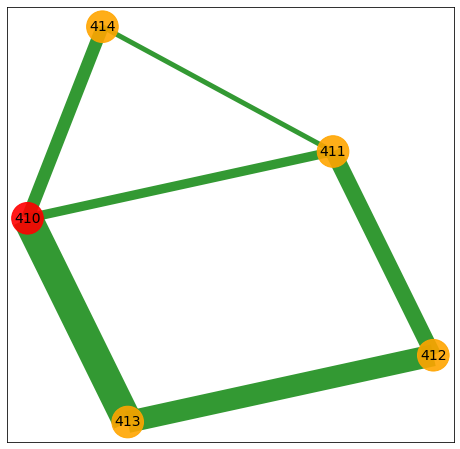

In [23]:
explain_test(g1, 410, 5, undir=True, plot=True, scale=50)

In [15]:
test_graphs2 = [extract_true_motif(g1, i, 399, 5, True) for i in selected_node]

In [26]:
s = time.time()
pred1, rec1, _ = evaluate_dataset(g1, selected_node, test_graphs2, 5, 7, ignore_self_loop=True, dumping_factor=0.6)
print(time.time() - s)
print("F1: %.4f Precision: %.4f Recall %.4f"  % (pred1*rec1*2/(pred1+rec1), pred1, rec1))

60it [00:01, 35.12it/s]

1.7137839794158936
F1: 0.9959 Precision: 0.9917 Recall 1.0000
